# Preprocessing

* **After applying initial EDA to our datasets, We'll now target the following preprocessing tasks:**

    * Handle null values and inconsistencies for all features.
    * Create a target variable (issue_happened) reflecting whether
    a problem happened during the transfer of this package/receptacle.
    * Propose, validate assumptions (with Ms.Lasmi), and work based on them.

In [1]:
import pandas as pd

In [2]:
packages_df = pd.read_csv('../data/interim/parsed_packages.csv')
receptacles_df = pd.read_csv('../data/interim/parsed_receptacles.csv')

C:\Users\djame\AppData\Local\Temp\ipykernel_8036\4123572792.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  receptacles_df = pd.read_csv('../data/interim/parsed_receptacles.csv')


In [3]:
packages_df.head()

,RECPTCL_FID,MAILITM_FID,date,etablissement_postal,EVENT_TYPE_CD,next_etablissement_postal,hour,day_of_week,service_indicator,serial_number,check_digit,country_code,origin_country,origin_hub,export_bag,destination_country,arrival_hub,inbound_unit,treatment_class,id_number
0,USORDADZALGDAUN30050001900005,0000420016941,2023-07-04 05:00:00.000,NaN,12,ETAB_2389,5,Tuesday,00,420016,9,41,US,ORD,A,DZ,ALG,DAU,N,30050001900005
1,USORDADZALGDAUN30050001900005,0000689914049,2023-07-04 05:00:00.000,NaN,12,ETAB_2389,5,Tuesday,00,689914,0,49,US,ORD,A,DZ,ALG,DAU,N,30050001900005
2,USORDADZALGDAUN30050001900005,0000700051000,2023-07-04 05:00:00.000,NaN,12,ETAB_2389,5,Tuesday,00,700051,0,00,US,ORD,A,DZ,ALG,DAU,N,30050001900005
3,USORDADZALGDAUN30102003900026,0031069949200,2023-12-04 05:00:00.000,NaN,12,ETAB_2389,5,Monday,00,31069949,2,00,US,ORD,A,DZ,ALG,DAU,N,30102003900026
4,FRCDGADZALGDAUN40553006010061,1A02349441537,2024-12-19 11:05:00.000,NaN,12,ETAB_2389,11,Thursday,1A,2349441,5,37,FR,CDG,A,DZ,ALG,DAU,N,40553006010061


In [4]:
packages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   RECPTCL_FID                1000000 non-null  object
 1   MAILITM_FID                1000000 non-null  object
 2   date                       1000000 non-null  object
 3   etablissement_postal       973228 non-null   object
 4   EVENT_TYPE_CD              1000000 non-null  int64 
 5   next_etablissement_postal  411733 non-null   object
 6   hour                       1000000 non-null  int64 
 7   day_of_week                1000000 non-null  object
 8   service_indicator          1000000 non-null  object
 9   serial_number              1000000 non-null  int64 
 10  check_digit                1000000 non-null  int64 
 11  country_code               1000000 non-null  object
 12  origin_country             1000000 non-null  object
 13  origin_hub                 1

In [22]:
receptacles_df.head()

,RECPTCL_FID,date,etablissement_postal,EVENT_TYPE_CD,next_etablissement_postal,origin_country,origin_hub,export_bag,destination_country,arrival_hub,inbound_unit,treatment_class,id_number
0,AEDXBADZAAEDACN45001001100219,2024-07-24 22:40:00.000,ETAB_0001,107,ETAB_0030,AE,DXB,A,DZ,AAE,DAC,N,45001001100219
1,AEDXBADZAAEDACN45001001100219,2024-07-26 16:18:34.623,ETAB_0002,130,NaN,AE,DXB,A,DZ,AAE,DAC,N,45001001100219
2,AEDXBADZAAEDACN45001001100219,2024-07-26 16:23:22.207,ETAB_0002,132,ETAB_0003,AE,DXB,A,DZ,AAE,DAC,N,45001001100219
3,AEDXBADZAAEDACN45001001100219,2024-07-28 13:04:36.387,ETAB_0003,132,ETAB_0033,AE,DXB,A,DZ,AAE,DAC,N,45001001100219
4,AEDXBADZAAEDACN45002001100075,2024-07-27 22:40:00.000,ETAB_0001,107,ETAB_0030,AE,DXB,A,DZ,AAE,DAC,N,45002001100075


In [23]:
receptacles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   RECPTCL_FID                1000000 non-null  object
 1   date                       1000000 non-null  object
 2   etablissement_postal       998889 non-null   object
 3   EVENT_TYPE_CD              1000000 non-null  int64 
 4   next_etablissement_postal  576148 non-null   object
 5   origin_country             1000000 non-null  object
 6   origin_hub                 1000000 non-null  object
 7   export_bag                 1000000 non-null  object
 8   destination_country        1000000 non-null  object
 9   arrival_hub                1000000 non-null  object
 10  inbound_unit               1000000 non-null  object
 11  treatment_class            1000000 non-null  object
 12  id_number                  1000000 non-null  object
dtypes: int64(1), object(12)
memo

In [5]:
packages_df['etablissement_postal'].isna().sum()

np.int64(26772)

* `etablissement_postal` have 26772 null values (2.7% of the whole dataset)
* We'll try to fill these null values using existing values based on similar
features that can indicate the `etablissement_postal`     

In [15]:
packages_df.groupby(['origin_country', 'origin_hub', 'service_indicator', 'country_code'])['etablissement_postal'].head()

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
975932    ETAB_0600
975934    ETAB_0001
975936    ETAB_0031
975938    ETAB_0057
975940    ETAB_0057
Name: etablissement_postal, Length: 3547, dtype: object

* Other features didn't allow us to infer the missing `etablissement_postal`
* As its null values are less than 5% of the dataset (2.7%), we drop these null values

In [ ]:
packages_df = packages_df[~packages_df['etablissement_postal'].isna()]
packages_df['etablissement_postal'].isna().sum()

np.int64(0)

* We propose to consider the packages having null `next_etablissement_postal`
as having issue during transfer, we'll try to validate that using
`EVENT_TYPE_CD` also

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
packages_df['next_etablissement_postal'] = packages_df['next_etablissement_postal'].fillna('Unknown')
packages_df['next_etablissement_postal'].isna().any()

C:\Users\djame\AppData\Local\Temp\ipykernel_8036\2270127384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  packages_df['next_etablissement_postal'] = packages_df['next_etablissement_postal'].fillna('Unknown')


np.False_

* Let's check if `EVENT_TYPE_CD` can indicate whether the `next_etablissement_postal` is null or not

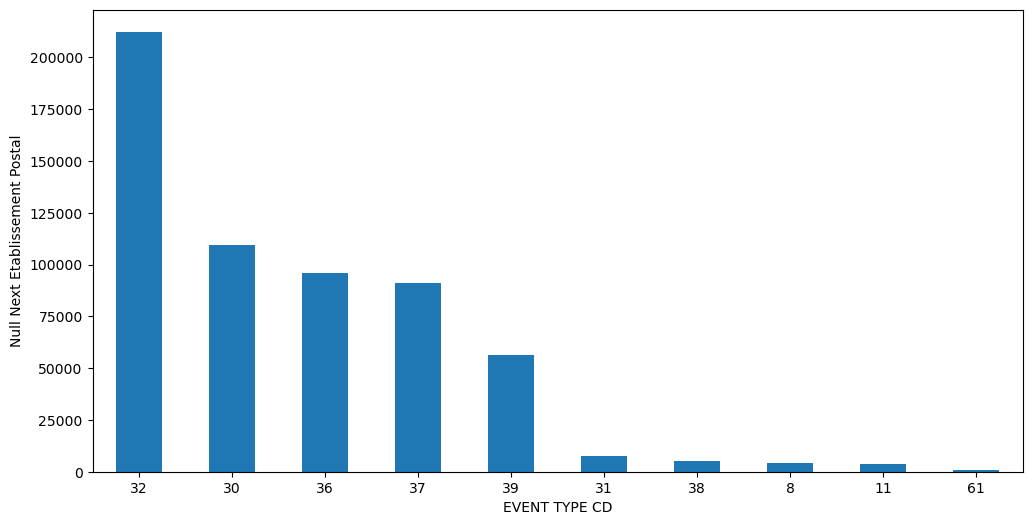

In [47]:
packages_unknown_next_etablissement = packages_df[packages_df['next_etablissement_postal'] == 'Unknown']
# keep only top EVENT_TYPES_ID
packages_unknown_next_etablissement = packages_unknown_next_etablissement['EVENT_TYPE_CD'].value_counts()

plt.figure(figsize=(12, 6))
packages_unknown_next_etablissement.head(10).plot(kind='bar')
plt.xlabel('EVENT TYPE CD')
plt.ylabel('Null Next Etablissement Postal')
plt.xticks(rotation=0)
plt.show()

In [67]:
packages_df[packages_df['MAILITM_FID'] == 'CA000094303US'].sort_values('date')

,RECPTCL_FID,MAILITM_FID,date,etablissement_postal,EVENT_TYPE_CD,next_etablissement_postal,hour,day_of_week,service_indicator,serial_number,check_digit,country_code,origin_country,origin_hub,export_bag,destination_country,arrival_hub,inbound_unit,treatment_class,id_number
1488,USLAXADZALGBACN40310005900099,CA000094303US,2024-11-22 05:15:00.000,ETAB_0030,12,ETAB_2389,5,Friday,CA,9430,3,US,US,LAX,A,DZ,ALG,BAC,N,40310005900099
1489,USJFKADZALGBACN40190007900103,CA000094303US,2024-11-24 21:30:00.000,ETAB_0030,12,ETAB_2389,21,Sunday,CA,9430,3,US,US,JFK,A,DZ,ALG,BAC,N,40190007900103
1490,USJFKADZALGBACN40190007900103,CA000094303US,2024-11-30 08:24:41.623,ETAB_0031,30,Unknown,8,Saturday,CA,9430,3,US,US,JFK,A,DZ,ALG,BAC,N,40190007900103
1491,USLAXADZALGBACN40310005900099,CA000094303US,2024-11-30 08:24:41.623,ETAB_0031,30,Unknown,8,Saturday,CA,9430,3,US,US,LAX,A,DZ,ALG,BAC,N,40310005900099
1492,USJFKADZALGBACN40190007900103,CA000094303US,2024-11-30 10:39:45.433,ETAB_0031,35,ETAB_0032,10,Saturday,CA,9430,3,US,US,JFK,A,DZ,ALG,BAC,N,40190007900103
1493,USLAXADZALGBACN40310005900099,CA000094303US,2024-11-30 10:39:45.433,ETAB_0031,35,ETAB_0032,10,Saturday,CA,9430,3,US,US,LAX,A,DZ,ALG,BAC,N,40310005900099
1494,USJFKADZALGBACN40190007900103,CA000094303US,2024-12-02 08:41:38.443,ETAB_0032,32,Unknown,8,Monday,CA,9430,3,US,US,JFK,A,DZ,ALG,BAC,N,40190007900103
1495,USLAXADZALGBACN40310005900099,CA000094303US,2024-12-02 08:41:38.443,ETAB_0032,32,Unknown,8,Monday,CA,9430,3,US,US,LAX,A,DZ,ALG,BAC,N,40310005900099
1496,USJFKADZALGBACN40190007900103,CA000094303US,2024-12-02 09:34:21.490,ETAB_0032,2,ETAB_0033,9,Monday,CA,9430,3,US,US,JFK,A,DZ,ALG,BAC,N,40190007900103
1497,USLAXADZALGBACN40310005900099,CA000094303US,2024-12-02 09:34:21.490,ETAB_0032,2,ETAB_0033,9,Monday,CA,9430,3,US,US,LAX,A,DZ,ALG,BAC,N,40310005900099
